In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
thailand = pd.read_csv('/content/spuerai_hackaton_thai_covid.csv')
korea = pd.read_csv('/content/c12990eb-5aec-4638-9e16-2ad09c8a227d.csv')

In [ ]:
korea.head()

,_id,Date,Sum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,1,2020-01-20T00:00:00,1.0,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-
1,2,2020-01-21T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,3,2020-01-22T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,4,2020-01-23T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,5,2020-01-24T00:00:00,1.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [ ]:
k1 = pd.read_csv('/content/k1.csv')

In [ ]:
thai = thailand
korean = korea

In [ ]:
thailand.head()

,year,weeknum,province,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_recovered,total_recovered,new_death,total_death,update_date
0,2020,3,พัทลุง,0,0,0,0,0.0,0.0,0,0,2023-05-21 11:53:27
1,2020,3,ชัยนาท,0,0,0,0,0.0,0.0,0,0,2024-09-22 19:03:26
2,2020,3,ขอนแก่น,0,0,0,0,0.0,0.0,0,0,2024-09-22 19:03:26
3,2020,3,บึงกาฬ,0,0,0,0,0.0,0.0,0,0,2024-09-22 19:03:26
4,2020,3,ทั้งประเทศ,2,2,0,0,0.0,0.0,0,0,2024-09-22 19:03:26


In [ ]:
thailand.columns

Index(['year', 'weeknum', 'province', 'new_case', 'total_case',
       'new_case_excludeabroad', 'total_case_excludeabroad', 'new_recovered',
       'total_recovered', 'new_death', 'total_death', 'update_date'],
      dtype='object')

In [ ]:
thai.tail()

,year,weeknum,province,new_case,total_case,new_case_excludeabroad,total_case_excludeabroad,new_recovered,total_recovered,new_death,total_death,update_date
14136,2022,52,ชัยภูมิ,20,33110,20,33107,NaN,NaN,0,205,2024-09-22 19:03:26
14137,2022,52,น่าน,33,15602,33,15599,NaN,NaN,0,45,2024-09-22 19:03:26
14138,2022,52,สุราษฎร์ธานี,37,49825,37,49166,NaN,NaN,0,340,2024-09-22 19:03:26
14139,2022,52,มุกดาหาร,2,9614,2,9608,NaN,NaN,0,67,2024-09-22 19:03:26
14140,2022,52,นครนายก,18,24888,18,24888,NaN,NaN,0,254,2024-09-22 19:03:26


In [ ]:
t = thai.loc[:,['year', 'weeknum', 'province', 'new_case']]
t

,year,weeknum,province,new_case
0,2020,3,พัทลุง,0
1,2020,3,ชัยนาท,0
2,2020,3,ขอนแก่น,0
3,2020,3,บึงกาฬ,0
4,2020,3,ทั้งประเทศ,2
...,...,...,...,...
14136,2022,52,ชัยภูมิ,20
14137,2022,52,น่าน,33
14138,2022,52,สุราษฎร์ธานี,37
14139,2022,52,มุกดาหาร,2


In [ ]:
a=[]
for i in range(len(t)):
  for j in range(i+1, len(t)):
    if t.loc[j, 'weeknum'] != t.loc[i, 'weeknum']:
      break
    if t.loc[i,'province'] == t.loc[j,'province']:
      a.append(i)
      break
for i in a:
  t=t.drop(index = i)
t

,year,weeknum,province,new_case
13,2020,3,มหาสารคาม,0
28,2020,3,ตรัง,0
37,2020,3,นนทบุรี,0
40,2020,3,สระแก้ว,0
43,2020,3,แพร่,0
...,...,...,...,...
14136,2022,52,ชัยภูมิ,20
14137,2022,52,น่าน,33
14138,2022,52,สุราษฎร์ธานี,37
14139,2022,52,มุกดาหาร,2


In [ ]:
t = t.reset_index(drop=True)
t

,year,weeknum,province,new_case
0,2020,3,มหาสารคาม,0
1,2020,3,ตรัง,0
2,2020,3,นนทบุรี,0
3,2020,3,สระแก้ว,0
4,2020,3,แพร่,0
...,...,...,...,...
12240,2022,52,ชัยภูมิ,20
12241,2022,52,น่าน,33
12242,2022,52,สุราษฎร์ธานี,37
12243,2022,52,มุกดาหาร,2


In [ ]:
t1 = t.pivot_table(index=['year', 'weeknum'], columns='province', values='new_case')

# Reset the index to make 'year' and 'week' columns again
t1.reset_index(inplace=True)
t1

province,year,weeknum,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,...,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน,ไม่ระบุ
0,2020,3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,5,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020,6,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2022,48,67.0,854.0,12.0,15.0,2.0,145.0,45.0,55.0,...,53.0,8.0,28.0,15.0,12.0,35.0,53.0,39.0,6.0,16.0
151,2022,49,28.0,806.0,9.0,27.0,9.0,90.0,46.0,57.0,...,81.0,17.0,18.0,4.0,18.0,21.0,54.0,38.0,3.0,0.0
152,2022,50,25.0,1000.0,7.0,22.0,2.0,62.0,63.0,26.0,...,88.0,9.0,16.0,23.0,25.0,38.0,42.0,14.0,3.0,0.0
153,2022,51,8.0,714.0,18.0,19.0,26.0,75.0,37.0,29.0,...,86.0,6.0,13.0,12.0,20.0,28.0,27.0,13.0,6.0,0.0


In [ ]:
t1.columns

Index(['year', 'weeknum', 'กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสินธุ์',
       'กำแพงเพชร', 'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท',
       'ชัยภูมิ', 'ชุมพร', 'ตรัง', 'ตราด', 'ตาก', 'ทั้งประเทศ', 'นครนายก',
       'นครปฐม', 'นครพนม', 'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์',
       'นนทบุรี', 'นราธิวาส', 'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี',
       'ประจวบคีรีขันธ์', 'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา', 'พะเยา',
       'พังงา', 'พัทลุง', 'พิจิตร', 'พิษณุโลก', 'ภูเก็ต', 'มหาสารคาม',
       'มุกดาหาร', 'ยะลา', 'ยโสธร', 'ระนอง', 'ระยอง', 'ราชบุรี', 'ร้อยเอ็ด',
       'ลพบุรี', 'ลำปาง', 'ลำพูน', 'ศรีสะเกษ', 'สกลนคร', 'สงขลา', 'สตูล',
       'สมุทรปราการ', 'สมุทรสงคราม', 'สมุทรสาคร', 'สระบุรี', 'สระแก้ว',
       'สิงห์บุรี', 'สุพรรณบุรี', 'สุราษฎร์ธานี', 'สุรินทร์', 'สุโขทัย',
       'หนองคาย', 'หนองบัวลำภู', 'อำนาจเจริญ', 'อุดรธานี', 'อุตรดิตถ์',
       'อุทัยธานี', 'อุบลราชธานี', 'อ่างทอง', 'เชียงราย', 'เชียงใหม่',
       'เพชรบุรี', 'เพชรบูรณ์', 'เลย

In [ ]:
t1 = t1.drop(columns = ['ไม่ระบุ','ทั้งประเทศ'])
t1

province,year,weeknum,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
0,2020,3,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020,4,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020,5,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,2020,6,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020,7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2022,48,67.0,854.0,12.0,15.0,2.0,145.0,45.0,55.0,...,26.0,53.0,8.0,28.0,15.0,12.0,35.0,53.0,39.0,6.0
151,2022,49,28.0,806.0,9.0,27.0,9.0,90.0,46.0,57.0,...,55.0,81.0,17.0,18.0,4.0,18.0,21.0,54.0,38.0,3.0
152,2022,50,25.0,1000.0,7.0,22.0,2.0,62.0,63.0,26.0,...,44.0,88.0,9.0,16.0,23.0,25.0,38.0,42.0,14.0,3.0
153,2022,51,8.0,714.0,18.0,19.0,26.0,75.0,37.0,29.0,...,33.0,86.0,6.0,13.0,12.0,20.0,28.0,27.0,13.0,6.0


In [ ]:
for i in range(len(t1)):
  if t1.loc[i,'year'] == 2022:
    print(t1.loc[i-1])
    break

province
year             2021.0
weeknum            52.0
กระบี่             35.0
กรุงเทพมหานคร     454.0
กาญจนบุรี          28.0
                  ...  
เพชรบุรี            8.0
เพชรบูรณ์          20.0
เลย                20.0
แพร่               15.0
แม่ฮ่องสอน         17.0
Name: 102, Length: 79, dtype: float64


In [ ]:
tc = t1.drop(columns = ['year','weeknum'])
tc = tc.columns
tc

Index(['กระบี่', 'กรุงเทพมหานคร', 'กาญจนบุรี', 'กาฬสินธุ์', 'กำแพงเพชร',
       'ขอนแก่น', 'จันทบุรี', 'ฉะเชิงเทรา', 'ชลบุรี', 'ชัยนาท', 'ชัยภูมิ',
       'ชุมพร', 'ตรัง', 'ตราด', 'ตาก', 'นครนายก', 'นครปฐม', 'นครพนม',
       'นครราชสีมา', 'นครศรีธรรมราช', 'นครสวรรค์', 'นนทบุรี', 'นราธิวาส',
       'น่าน', 'บึงกาฬ', 'บุรีรัมย์', 'ปทุมธานี', 'ประจวบคีรีขันธ์',
       'ปราจีนบุรี', 'ปัตตานี', 'พระนครศรีอยุธยา', 'พะเยา', 'พังงา', 'พัทลุง',
       'พิจิตร', 'พิษณุโลก', 'ภูเก็ต', 'มหาสารคาม', 'มุกดาหาร', 'ยะลา',
       'ยโสธร', 'ระนอง', 'ระยอง', 'ราชบุรี', 'ร้อยเอ็ด', 'ลพบุรี', 'ลำปาง',
       'ลำพูน', 'ศรีสะเกษ', 'สกลนคร', 'สงขลา', 'สตูล', 'สมุทรปราการ',
       'สมุทรสงคราม', 'สมุทรสาคร', 'สระบุรี', 'สระแก้ว', 'สิงห์บุรี',
       'สุพรรณบุรี', 'สุราษฎร์ธานี', 'สุรินทร์', 'สุโขทัย', 'หนองคาย',
       'หนองบัวลำภู', 'อำนาจเจริญ', 'อุดรธานี', 'อุตรดิตถ์', 'อุทัยธานี',
       'อุบลราชธานี', 'อ่างทอง', 'เชียงราย', 'เชียงใหม่', 'เพชรบุรี',
       'เพชรบูรณ์', 'เลย', 'แพร่', 'แม่ฮ่องสอน'],
      d

In [ ]:
kc = k1.columns
kc

Index(['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju', 'Daejeon', 'Ulsan',
       'Sejong', 'Kyeong-gi', 'Gangwon', 'Chungbuk', 'Chungnam', 'Jeonbuk',
       'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'],
      dtype='object')

In [ ]:
all = pd.concat([t1, k1], axis=1)
all = all.drop(columns = ['year','weeknum'])
all

,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,12.0,6.0,3.0,1.0,2.0,0.0,171.0,11.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,67.0,854.0,12.0,15.0,2.0,145.0,45.0,55.0,281.0,18.0,...,3693.0,119010.0,11667.0,13419.0,17954.0,13567.0,13144.0,18602.0,23564.0,3412.0
151,28.0,806.0,9.0,27.0,9.0,90.0,46.0,57.0,225.0,8.0,...,3809.0,126611.0,12787.0,13916.0,19645.0,14700.0,15220.0,19345.0,28394.0,3987.0
152,25.0,1000.0,7.0,22.0,2.0,62.0,63.0,26.0,168.0,13.0,...,4050.0,131093.0,11965.0,14461.0,19033.0,14836.0,15968.0,19658.0,30633.0,4374.0
153,8.0,714.0,18.0,19.0,26.0,75.0,37.0,29.0,143.0,17.0,...,3696.0,126217.0,11667.0,13515.0,18907.0,13352.0,15251.0,19833.0,31088.0,4574.0


In [ ]:
all_corr = all.corr()
all_corr

,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
กระบี่,1.000000,0.554772,0.736302,0.693217,0.678714,0.743695,0.885795,0.674464,0.739857,0.643471,...,0.589459,0.615460,0.590023,0.592136,0.594799,0.596385,0.594279,0.575011,0.595998,0.598739
กรุงเทพมหานคร,0.554772,1.000000,0.844911,0.786728,0.776576,0.717118,0.690878,0.874316,0.863030,0.774430,...,0.428522,0.431711,0.438544,0.433308,0.436591,0.443606,0.441594,0.441479,0.425650,0.455572
กาญจนบุรี,0.736302,0.844911,1.000000,0.889062,0.916242,0.870579,0.843022,0.953256,0.935982,0.831203,...,0.507086,0.510861,0.518291,0.513320,0.516934,0.523599,0.531330,0.511257,0.500000,0.513235
กาฬสินธุ์,0.693217,0.786728,0.889062,1.000000,0.961098,0.902669,0.725863,0.915782,0.860166,0.866476,...,0.658366,0.664990,0.670987,0.665129,0.667367,0.674691,0.679585,0.666156,0.654711,0.668536
กำแพงเพชร,0.678714,0.776576,0.916242,0.961098,1.000000,0.897377,0.717192,0.929939,0.875769,0.862234,...,0.604704,0.614266,0.626260,0.614906,0.617996,0.629373,0.635816,0.617368,0.604649,0.626113
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jeonbuk,0.596385,0.443606,0.523599,0.674691,0.629373,0.559225,0.484285,0.578884,0.523010,0.495649,...,0.995139,0.985631,0.997691,0.998273,0.998532,1.000000,0.994079,0.997589,0.988754,0.981513
Jeonnam,0.594279,0.441594,0.531330,0.679585,0.635816,0.571269,0.496187,0.591751,0.526238,0.469502,...,0.992781,0.967129,0.992174,0.992776,0.992808,0.994079,1.000000,0.992861,0.974364,0.966074
Gyeongbuk,0.575011,0.441479,0.511257,0.666156,0.617368,0.556326,0.473136,0.565368,0.505302,0.475139,...,0.993724,0.978356,0.997076,0.996167,0.996470,0.997589,0.992861,1.000000,0.981541,0.972108
Gyeongnam,0.595998,0.425650,0.500000,0.654711,0.604649,0.513310,0.463537,0.558052,0.513649,0.511889,...,0.982509,0.994113,0.984817,0.989426,0.988866,0.988754,0.974364,0.981541,1.000000,0.986996


In [ ]:
all_corr_f=all_corr.iloc[-17:,:77]
all_corr_f

,กระบี่,กรุงเทพมหานคร,กาญจนบุรี,กาฬสินธุ์,กำแพงเพชร,ขอนแก่น,จันทบุรี,ฉะเชิงเทรา,ชลบุรี,ชัยนาท,...,อุทัยธานี,อุบลราชธานี,อ่างทอง,เชียงราย,เชียงใหม่,เพชรบุรี,เพชรบูรณ์,เลย,แพร่,แม่ฮ่องสอน
Seoul,0.623852,0.432604,0.508850,0.661970,0.610386,0.514984,0.470556,0.560340,0.527006,0.548555,...,0.527859,0.458260,0.531113,0.502780,0.474275,0.519225,0.448484,0.539342,0.613813,0.365186
Busan,0.570337,0.391747,0.449380,0.603002,0.562918,0.442673,0.402382,0.493994,0.480937,0.560703,...,0.466379,0.396209,0.459979,0.509685,0.411998,0.462177,0.426751,0.449782,0.560044,0.276396
Daegu,0.585018,0.437407,0.503826,0.660357,0.606133,0.535985,0.464931,0.554692,0.506815,0.502802,...,0.555312,0.468862,0.540520,0.456931,0.456814,0.497567,0.424186,0.574041,0.629390,0.360471
Incheon,0.620190,0.428191,0.507782,0.663010,0.612800,0.514356,0.465005,0.556133,0.525236,0.560870,...,0.527806,0.457198,0.523042,0.506169,0.470519,0.516392,0.452502,0.538556,0.618158,0.350557
Gwangju,0.604315,0.442408,0.525818,0.680040,0.631600,0.555310,0.484453,0.578620,0.528035,0.511462,...,0.567676,0.486077,0.565102,0.467294,0.477854,0.514909,0.435011,0.593426,0.645487,0.385620
Daejeon,0.595420,0.441843,0.519545,0.670126,0.623481,0.550395,0.477307,0.572511,0.519502,0.504839,...,0.567225,0.477808,0.560202,0.450173,0.468436,0.507424,0.426633,0.589590,0.636876,0.380570
Ulsan,0.584702,0.435275,0.497295,0.654324,0.604789,0.516308,0.457399,0.553025,0.508693,0.512060,...,0.541626,0.454392,0.539351,0.462431,0.450010,0.499078,0.423858,0.546460,0.612582,0.347867
Sejong,0.589459,0.428522,0.507086,0.658366,0.604704,0.532799,0.476075,0.568981,0.510842,0.471021,...,0.550707,0.467636,0.559797,0.424722,0.462844,0.513093,0.411484,0.576195,0.615221,0.383639
Kyeong-gi,0.615460,0.431711,0.510861,0.664990,0.614266,0.523476,0.471357,0.562978,0.525409,0.538880,...,0.537636,0.464202,0.537789,0.489087,0.471521,0.516662,0.442964,0.552608,0.621361,0.364041
Gangwon,0.590023,0.438544,0.518291,0.670987,0.626260,0.553520,0.480665,0.576008,0.516676,0.481136,...,0.573142,0.480549,0.574253,0.435858,0.467513,0.506884,0.416638,0.597011,0.637766,0.391298


In [ ]:
all_corr_f.max()

,0
กระบี่,0.623852
กรุงเทพมหานคร,0.455572
กาญจนบุรี,0.531330
กาฬสินธุ์,0.680040
กำแพงเพชร,0.635816
...,...
เพชรบุรี,0.520136
เพชรบูรณ์,0.452502
เลย,0.617059
แพร่,0.648069


In [ ]:
covid_data = all

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming 'covid_data' is your DataFrame where each column is a city
# and rows represent daily new cases.

# Example data structure for 92 cities:
#      seoul  busan  jeju  city4 ... city92
# 0       5      1     0      2      3
# 1       7      3     1      4      2
# 2      12      5     2      5      6
# ...

# Step 1: Plot data for each city
def plot_city_cases(covid_data):
    plt.figure(figsize=(12, 8))
    for city in covid_data.columns:
        plt.plot(covid_data.index, covid_data[city], label=city)
    plt.xlabel('Days')
    plt.ylabel('Number of Patients')
    plt.title('COVID-19 Cases in Different Cities')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid()
    plt.show()

# Uncomment to visualize the data
# plot_city_cases(covid_data)

# Step 2: Function to find the best shift and MSE between two cities
def find_best_shift(city_A_data, city_B_data, max_shift=14):
    best_shift = 0
    best_mse = float('inf')

    # Shift city B data by `shift` days and calculate MSE
    for shift in range(1, max_shift+1):
        shifted_B = city_B_data.shift(shift).dropna()  # Shift and drop NaNs
        aligned_A = city_A_data.iloc[:-shift]  # Align A with the shifted B
        mse = mean_squared_error(aligned_A, shifted_B)

        if mse < best_mse:
            best_mse = mse
            best_shift = shift

    return best_shift, best_mse

# Step 3: Find relationships between all city pairs
def analyze_city_relationships(covid_data, max_shift=14):
    city_relationships = []

    # Loop over each pair of cities
    for i, city_A in enumerate(covid_data.columns):
        for j, city_B in enumerate(covid_data.columns):
            if city_A != city_B:
                city_A_data = covid_data[city_A]
                city_B_data = covid_data[city_B]

                # Find best shift and its MSE
                best_shift, best_mse = find_best_shift(city_A_data, city_B_data, max_shift)

                # Store the result
                city_relationships.append({
                    "city_A": city_A,
                    "city_B": city_B,
                    "best_shift": best_shift,
                    "best_mse": best_mse
                })

    # Sort relationships by MSE (smaller MSE means better match)
    city_relationships = sorted(city_relationships, key=lambda x: x['best_mse'])

    return city_relationships

# Step 4: Display the top relationships (most probable paths)
def display_top_relationships(city_relationships, top_n=10):
    print(f"Top {top_n} city relationships based on best shift and MSE:")
    for i, rel in enumerate(city_relationships[:top_n]):
        print(f"{i+1}. {rel['city_A']} surge, then {rel['city_B']} surge with best shift {rel['best_shift']} days and MSE {rel['best_mse']:.2f}")

# Step 5: Putting it all together
city_relationships = analyze_city_relationships(covid_data, max_shift=14)
display_top_relationships(city_relationships, top_n=10)


Top 10 city relationships based on best shift and MSE:
1. พะเยา surge, then มุกดาหาร surge with best shift 1 days and MSE 1984.58
2. มุกดาหาร surge, then พะเยา surge with best shift 1 days and MSE 1984.58
3. มุกดาหาร surge, then อำนาจเจริญ surge with best shift 1 days and MSE 2891.95
4. อำนาจเจริญ surge, then มุกดาหาร surge with best shift 1 days and MSE 2891.95
5. ชัยนาท surge, then พะเยา surge with best shift 1 days and MSE 3193.88
6. พะเยา surge, then ชัยนาท surge with best shift 1 days and MSE 3193.88
7. สิงห์บุรี surge, then อำนาจเจริญ surge with best shift 1 days and MSE 3656.03
8. อำนาจเจริญ surge, then สิงห์บุรี surge with best shift 1 days and MSE 3656.03
9. ชัยนาท surge, then มุกดาหาร surge with best shift 1 days and MSE 3922.41
10. มุกดาหาร surge, then ชัยนาท surge with best shift 1 days and MSE 3922.41


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming 'covid_data' is your DataFrame where each column is a city
# tc contains Thailand cities' names and kc contains Korea cities' names

# Example:
# tc = ['Bangkok', 'Chiang Mai', 'Phuket']
# kc = ['Seoul', 'Busan', 'Incheon']

# Step 2: Function to find the best shift and MSE between two cities
def find_best_shift(city_A_data, city_B_data, max_shift=14):
    best_shift = 0
    best_mse = float('inf')

    # Shift city B data by `shift` days and calculate MSE
    for shift in range(1, max_shift + 1):
        shifted_B = city_B_data.shift(shift).dropna()  # Shift and drop NaNs
        aligned_A = city_A_data.iloc[:-shift]  # Align A with the shifted B
        mse = mean_squared_error(aligned_A, shifted_B)

        if mse < best_mse:
            best_mse = mse
            best_shift = shift

    return best_shift, best_mse

# Step 3: Find relationships between Thailand and Korea city pairs
def analyze_city_relationships(covid_data, tc, kc, max_shift=14):
    city_relationships = []

    # Loop over each Thailand and Korea city pair
    for city_A in tc:
        for city_B in kc:
            city_A_data = covid_data[city_A]
            city_B_data = covid_data[city_B]

            # Find best shift and its MSE
            best_shift, best_mse = find_best_shift(city_A_data, city_B_data, max_shift)

            # Store the result
            city_relationships.append({
                "city_A": city_A,
                "city_B": city_B,
                "best_shift": best_shift,
                "best_mse": best_mse
            })

    # Sort relationships by MSE (smaller MSE means better match)
    city_relationships = sorted(city_relationships, key=lambda x: x['best_mse'])

    # Remove reverse duplicates (e.g., "Seoul -> Busan" and "Busan -> Seoul")
    seen = set()
    unique_relationships = []
    for rel in city_relationships:
        pair = frozenset([rel['city_A'], rel['city_B']])
        if pair not in seen:
            unique_relationships.append(rel)
            seen.add(pair)

    return unique_relationships

# Step 4: Display the top relationships (most probable paths)
def display_top_relationships(city_relationships, top_n=10):
    print(f"Top {top_n} Thailand-Korea city relationships based on best shift and MSE:")
    for i, rel in enumerate(city_relationships[:top_n]):
        print(f"{i+1}. {rel['city_A']} surge, then {rel['city_B']} surge with best shift {rel['best_shift']} days and MSE {rel['best_mse']:.2f}")

# Step 5: Putting it all together
# Example: covid_data is your dataset, tc is Thailand cities, kc is Korea cities
city_relationships = analyze_city_relationships(covid_data, tc, kc, max_shift=14)
display_top_relationships(city_relationships, top_n=10)


Top 10 Thailand-Korea city relationships based on best shift and MSE:
1. นครศรีธรรมราช surge, then Sejong surge with best shift 10 days and MSE 6019051.12
2. นนทบุรี surge, then Sejong surge with best shift 5 days and MSE 9672248.87
3. ชลบุรี surge, then Sejong surge with best shift 5 days and MSE 9769377.64
4. นครปฐม surge, then Sejong surge with best shift 5 days and MSE 10084413.89
5. นครราชสีมา surge, then Sejong surge with best shift 5 days and MSE 10111333.90
6. บุรีรัมย์ surge, then Sejong surge with best shift 5 days and MSE 10116919.51
7. ฉะเชิงเทรา surge, then Sejong surge with best shift 5 days and MSE 10463531.05
8. พระนครศรีอยุธยา surge, then Sejong surge with best shift 5 days and MSE 10482391.95
9. ร้อยเอ็ด surge, then Sejong surge with best shift 5 days and MSE 10492026.45
10. ราชบุรี surge, then Sejong surge with best shift 5 days and MSE 10548970.08


In [ ]:
x = tc
tc = kc
kc = x

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Assuming 'covid_data' is your DataFrame where each column is a city
# tc contains Thailand cities' names and kc contains Korea cities' names

# Example:
# tc = ['Bangkok', 'Chiang Mai', 'Phuket']
# kc = ['Seoul', 'Busan', 'Incheon']

# Step 2: Function to find the best shift and MSE between two cities
def find_best_shift(city_A_data, city_B_data, max_shift=14):
    best_shift = 0
    best_mse = float('inf')

    # Shift city B data by `shift` days and calculate MSE
    for shift in range(1, max_shift + 1):
        shifted_B = city_B_data.shift(shift).dropna()  # Shift and drop NaNs
        aligned_A = city_A_data.iloc[:-shift]  # Align A with the shifted B
        mse = mean_squared_error(aligned_A, shifted_B)

        if mse < best_mse:
            best_mse = mse
            best_shift = shift

    return best_shift, best_mse

# Step 3: Find relationships between Thailand and Korea city pairs
def analyze_city_relationships(covid_data, tc, kc, max_shift=14):
    city_relationships = []

    # Loop over each Thailand and Korea city pair
    for city_A in tc:
        for city_B in kc:
            city_A_data = covid_data[city_A]
            city_B_data = covid_data[city_B]

            # Find best shift and its MSE
            best_shift, best_mse = find_best_shift(city_A_data, city_B_data, max_shift)

            # Store the result
            city_relationships.append({
                "city_A": city_A,
                "city_B": city_B,
                "best_shift": best_shift,
                "best_mse": best_mse
            })

    # Sort relationships by MSE (smaller MSE means better match)
    city_relationships = sorted(city_relationships, key=lambda x: x['best_mse'])

    # Remove reverse duplicates (e.g., "Seoul -> Busan" and "Busan -> Seoul")
    seen = set()
    unique_relationships = []
    for rel in city_relationships:
        pair = frozenset([rel['city_A'], rel['city_B']])
        if pair not in seen:
            unique_relationships.append(rel)
            seen.add(pair)

    return unique_relationships

# Step 4: Display the top relationships (most probable paths)
def display_top_relationships(city_relationships, top_n=10):
    print(f"Top {top_n} Thailand-Korea city relationships based on best shift and MSE:")
    for i, rel in enumerate(city_relationships[:top_n]):
        print(f"{i+1}. {rel['city_A']} surge, then {rel['city_B']} surge with best shift {rel['best_shift']} days and MSE {rel['best_mse']:.2f}")

# Step 5: Putting it all together
# Example: covid_data is your dataset, tc is Thailand cities, kc is Korea cities
city_relationships = analyze_city_relationships(covid_data, tc, kc, max_shift=14)
display_top_relationships(city_relationships, top_n=10)


Top 10 Thailand-Korea city relationships based on best shift and MSE:
1. Sejong surge, then นครศรีธรรมราช surge with best shift 10 days and MSE 6019051.12
2. Sejong surge, then นนทบุรี surge with best shift 5 days and MSE 9672248.87
3. Sejong surge, then ชลบุรี surge with best shift 5 days and MSE 9769377.64
4. Sejong surge, then นครปฐม surge with best shift 5 days and MSE 10084413.89
5. Sejong surge, then นครราชสีมา surge with best shift 5 days and MSE 10111333.90
6. Sejong surge, then บุรีรัมย์ surge with best shift 5 days and MSE 10116919.51
7. Sejong surge, then ฉะเชิงเทรา surge with best shift 5 days and MSE 10463531.05
8. Sejong surge, then พระนครศรีอยุธยา surge with best shift 5 days and MSE 10482391.95
9. Sejong surge, then ร้อยเอ็ด surge with best shift 5 days and MSE 10492026.45
10. Sejong surge, then ราชบุรี surge with best shift 5 days and MSE 10548970.08


In [ ]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error

# Step 2: Function to find the best shift and MSE between two cities
def find_best_shift(city_A_data, city_B_data, max_shift=14):
    best_shift = 0
    best_mse = float('inf')

    # Shift city B data by `shift` days and calculate MSE
    for shift in range(1, max_shift + 1):
        shifted_B = city_B_data.shift(shift).dropna()  # Shift and drop NaNs
        aligned_A = city_A_data.iloc[:-shift]  # Align A with the shifted B
        mse = mean_squared_error(aligned_A, shifted_B)

        if mse < best_mse:
            best_mse = mse
            best_shift = shift

    return best_shift, best_mse

# Step 3: Find the least loss relationship for each city
def find_least_loss_relationships(covid_data, tc, kc, max_shift=14):
    least_loss_relationships = []

    # Find the least loss match for each Thailand city
    for city_A in tc:
        best_match = None
        best_mse = float('inf')
        best_shift = None

        for city_B in kc:
            city_A_data = covid_data[city_A]
            city_B_data = covid_data[city_B]

            # Find best shift and its MSE
            shift, mse = find_best_shift(city_A_data, city_B_data, max_shift)

            # Keep track of the city with the lowest loss
            if mse < best_mse:
                best_mse = mse
                best_shift = shift
                best_match = city_B

        # Store the best match for this city
        least_loss_relationships.append({
            "city_A": city_A,
            "city_B": best_match,
            "best_shift": best_shift,
            "best_mse": best_mse
        })

    # Find the least loss match for each Korea city
    for city_B in kc:
        best_match = None
        best_mse = float('inf')
        best_shift = None

        for city_A in tc:
            city_A_data = covid_data[city_A]
            city_B_data = covid_data[city_B]

            # Find best shift and its MSE
            shift, mse = find_best_shift(city_A_data, city_B_data, max_shift)

            # Keep track of the city with the lowest loss
            if mse < best_mse:
                best_mse = mse
                best_shift = shift
                best_match = city_A

        # Store the best match for this city
        least_loss_relationships.append({
            "city_A": city_B,
            "city_B": best_match,
            "best_shift": best_shift,
            "best_mse": best_mse
        })

    return least_loss_relationships

# Step 4: Display the least loss relationships
def display_least_loss_relationships(least_loss_relationships):
    print("Least loss relationships (one for each city):")
    for rel in least_loss_relationships:
        print(f"{rel['city_A']} surge, then {rel['city_B']} surge with best shift {rel['best_shift']} days and MSE {rel['best_mse']:.2f}")

# Step 5: Putting it all together
# Example: covid_data is your dataset, tc is Thailand cities, kc is Korea cities
least_loss_relationships = find_least_loss_relationships(covid_data, tc, kc, max_shift=14)
display_least_loss_relationships(least_loss_relationships)


Least loss relationships (one for each city):
กระบี่ surge, then Sejong surge with best shift 4 days and MSE 13179869.00
กรุงเทพมหานคร surge, then Jeju surge with best shift 1 days and MSE 74749835.01
กาญจนบุรี surge, then Sejong surge with best shift 5 days and MSE 11971548.42
กาฬสินธุ์ surge, then Sejong surge with best shift 5 days and MSE 12233318.16
กำแพงเพชร surge, then Sejong surge with best shift 5 days and MSE 12848415.63
ขอนแก่น surge, then Sejong surge with best shift 5 days and MSE 10566080.50
จันทบุรี surge, then Sejong surge with best shift 5 days and MSE 12597484.65
ฉะเชิงเทรา surge, then Sejong surge with best shift 5 days and MSE 10463531.05
ชลบุรี surge, then Sejong surge with best shift 5 days and MSE 9769377.64
ชัยนาท surge, then Sejong surge with best shift 4 days and MSE 14401328.75
ชัยภูมิ surge, then Sejong surge with best shift 5 days and MSE 12916371.53
ชุมพร surge, then Sejong surge with best shift 4 days and MSE 13068418.52
ตรัง surge, then Sejong surge with

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Step 1: LSTM Model Definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize hidden state
        c_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize cell state
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])  # Only take the output from the last time step
        return out

# Step 2: Prepare the data
# Assume covid_data is the DataFrame where each column is a city's time series
scaler = MinMaxScaler()
covid_data_scaled = scaler.fit_transform(covid_data)

# Convert the data into sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

# Example usage for one city pair (you can loop over city pairs)
seq_length = 7
city_A_data = covid_data_scaled[:, 0]  # Example: Seoul
city_B_data = covid_data_scaled[:, 1]  # Example: Busan

X, y = create_sequences(city_A_data, seq_length)

# Step 3: Convert data to PyTorch tensors
X = torch.FloatTensor(X).unsqueeze(-1)
y = torch.FloatTensor(y).unsqueeze(-1)

# Step 4: Define the model, loss function, and optimizer
input_size = 1
hidden_size = 64
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 5: Train the model (simplified)
num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = loss_function(output, y)
    loss.backward()
    optimizer.step()
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Step 6: Prediction (with probabilities)
model.eval()
with torch.no_grad():
    predictions = model(X).numpy()

# Now calculate probabilities based on model uncertainty or error terms


Epoch 1/50, Loss: 0.13135772943496704
Epoch 2/50, Loss: 0.1194746270775795
Epoch 3/50, Loss: 0.10865781456232071
Epoch 4/50, Loss: 0.09883817285299301
Epoch 5/50, Loss: 0.08996798098087311
Epoch 6/50, Loss: 0.08202921599149704
Epoch 7/50, Loss: 0.07505233585834503
Epoch 8/50, Loss: 0.06912987679243088
Epoch 9/50, Loss: 0.06441998481750488
Epoch 10/50, Loss: 0.061134207993745804
Epoch 11/50, Loss: 0.05948283150792122
Epoch 12/50, Loss: 0.059511907398700714
Epoch 13/50, Loss: 0.06080866977572441
Epoch 14/50, Loss: 0.06238817423582077
Epoch 15/50, Loss: 0.06323089450597763
Epoch 16/50, Loss: 0.06291382014751434
Epoch 17/50, Loss: 0.06161642074584961
Epoch 18/50, Loss: 0.059790290892124176
Epoch 19/50, Loss: 0.05788093060255051
Epoch 20/50, Loss: 0.05619383975863457
Epoch 21/50, Loss: 0.0548696406185627
Epoch 22/50, Loss: 0.053916871547698975
Epoch 23/50, Loss: 0.05326274409890175
Epoch 24/50, Loss: 0.05279864743351936
Epoch 25/50, Loss: 0.052411582320928574
Epoch 26/50, Loss: 0.0520018972

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Data preparation
data = {
    "Seoul": [5, 7, 12, 14, 8, 10, 15, 20, 22, 25],
    "Busan": [1, 3, 5, 7, 6, 8, 4, 5, 7, 10],
    "Incheon": [0, 1, 2, 1, 3, 4, 2, 3, 5, 6]
}
covid_data = all

# Scaling
scaler = MinMaxScaler()
covid_data_scaled = scaler.fit_transform(covid_data)

# Sequence creation
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
        targets.append(data[i + seq_length])
    return np.array(sequences), np.array(targets)

seq_length = 5
city_A_data = covid_data_scaled[:, 0]  # Seoul
city_B_data = covid_data_scaled[:, 1]  # Busan

X_A, y_A = create_sequences(city_A_data, seq_length)
X_B, y_B = create_sequences(city_B_data, seq_length)

X = np.concatenate((X_A, X_B), axis=2)
y = y_B

# Convert to PyTorch tensors
X = torch.FloatTensor(X)
y = torch.FloatTensor(y).unsqueeze(-1)

# LSTM model definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize hidden state
        c_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize cell state
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])  # Only take the output from the last time step
        return out

# Model, loss function, and optimizer
input_size = 1
hidden_size = 64
output_size = 1
model = LSTMModel(input_size, hidden_size, output_size)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X)
    loss = loss_function(output, y)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Prediction
model.eval()
with torch.no_grad():
    predictions = model(X).numpy()

predictions_inverse = scaler.inverse_transform(predictions)

# Print predictions
print("Predictions (Busan cases based on Seoul):", predictions_inverse)

# Generate probabilities
def calculate_probabilities(predictions):
    threshold = 0.5  # Define a threshold for surge
    probabilities = (predictions > threshold).astype(float)
    return probabilities

probabilities = calculate_probabilities(predictions_inverse)
print("Probabilities of surge in Busan based on Seoul:", probabilities)


AxisError: axis 2 is out of bounds for array of dimension 2

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Data preparation
data = {
    "Seoul": [5, 7, 12, 14, 8, 10, 15, 20, 22, 25],
    "Busan": [1, 3, 5, 7, 6, 8, 4, 5, 7, 10],
    "Incheon": [0, 1, 2, 1, 3, 4, 2, 3, 5, 6]
}
covid_data = all

# Scaling
scaler = MinMaxScaler()
covid_data_scaled = scaler.fit_transform(covid_data)

# Convert the data into sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])  # Append the sequence
        targets.append(data[i + seq_length])       # Append the target value
    return np.array(sequences), np.array(targets)

# Sequence length
seq_length = 5

# Prepare sequences for both cities (Seoul and Busan)
city_A_data = covid_data_scaled[:, 0]  # Seoul
city_B_data = covid_data_scaled[:, 1]  # Busan

# Create sequences for Seoul and Busan
X_A, y_A = create_sequences(city_A_data, seq_length)
X_B, y_B = create_sequences(city_B_data, seq_length)

# Ensure the shapes are correct
print("X_A shape:", X_A.shape)  # Should be (number_of_samples, seq_length)
print("y_A shape:", y_A.shape)  # Should be (number_of_samples,)

# Reshape the sequences for LSTM input
X = X_A.reshape(X_A.shape[0], X_A.shape[1], 1)  # Reshape to (samples, seq_length, input_size)
y = y_B.reshape(-1, 1)  # Reshape to (samples, 1)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# LSTM model definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize hidden state
        c_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize cell state
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])  # Only take the output from the last time step
        return out

# Model, loss function, and optimizer
input_size = 1  # One feature (cases)
hidden_size = 64
output_size = 1  # Predict next day's cases
model = LSTMModel(input_size, hidden_size, output_size)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = loss_function(output, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Prediction
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).numpy()

# Inverse transform to get back to original scale
# We need to ensure predictions are reshaped to match the original scaler input shape
predictions_reshaped = predictions.reshape(-1, 1)  # Reshape to (samples, 1)
predictions_inverse = scaler.inverse_transform(np.concatenate((np.zeros_like(predictions_reshaped), predictions_reshaped, np.zeros_like(predictions_reshaped)), axis=1))[:, 1]  # Inverse scale

# Print predictions
print("Predictions (Busan cases based on Seoul):", predictions_inverse)

# Generate probabilities
def calculate_probabilities(predictions):
    threshold = 0.5  # Define a threshold for surge
    probabilities = (predictions > threshold).astype(float)
    return probabilities

probabilities = calculate_probabilities(predictions_inverse)
print("Probabilities of surge in Busan based on Seoul:", probabilities)


X_A shape: (150, 5)
y_A shape: (150,)
Epoch 10/100, Loss: 0.07398083806037903
Epoch 20/100, Loss: 0.07141963392496109
Epoch 30/100, Loss: 0.0669458881020546
Epoch 40/100, Loss: 0.05905015766620636
Epoch 50/100, Loss: 0.05726838484406471
Epoch 60/100, Loss: 0.05596637725830078
Epoch 70/100, Loss: 0.05598810315132141
Epoch 80/100, Loss: 0.05571701005101204
Epoch 90/100, Loss: 0.055518392473459244
Epoch 100/100, Loss: 0.05534675717353821


ValueError: operands could not be broadcast together with shapes (150,3) (94,) (150,3) 

In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

# Data preparation
data = {
    "Seoul": [5, 7, 12, 14, 8, 10, 15, 20, 22, 25],
    "Busan": [1, 3, 5, 7, 6, 8, 4, 5, 7, 10],
    "Incheon": [0, 1, 2, 1, 3, 4, 2, 3, 5, 6]
}
covid_data = all

# Scaling
scaler = MinMaxScaler()
covid_data_scaled = scaler.fit_transform(covid_data)

# Convert the data into sequences
def create_sequences(data, seq_length):
    sequences = []
    targets = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])  # Append the sequence
        targets.append(data[i + seq_length])       # Append the target value
    return np.array(sequences), np.array(targets)

# Sequence length
seq_length = 5

# Prepare sequences for both cities (Seoul and Busan)
city_A_data = covid_data_scaled[:, 0]  # Seoul
city_B_data = covid_data_scaled[:, 1]  # Busan

# Create sequences for Seoul and Busan
X_A, y_A = create_sequences(city_A_data, seq_length)
X_B, y_B = create_sequences(city_B_data, seq_length)

# Ensure the shapes are correct
print("X_A shape:", X_A.shape)  # Should be (number_of_samples, seq_length)
print("y_A shape:", y_A.shape)  # Should be (number_of_samples,)

# Reshape the sequences for LSTM input
X = X_A.reshape(X_A.shape[0], X_A.shape[1], 1)  # Reshape to (samples, seq_length, input_size)
y = y_B.reshape(-1, 1)  # Reshape to (samples, 1)

# Convert to PyTorch tensors
X_tensor = torch.FloatTensor(X)
y_tensor = torch.FloatTensor(y)

# LSTM model definition
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers=2):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize hidden state
        c_0 = torch.zeros(2, x.size(0), hidden_size)  # Initialize cell state
        out, _ = self.lstm(x, (h_0, c_0))
        out = self.fc(out[:, -1, :])  # Only take the output from the last time step
        return out

# Model, loss function, and optimizer
input_size = 1  # One feature (cases)
hidden_size = 64
output_size = 1  # Predict next day's cases
model = LSTMModel(input_size, hidden_size, output_size)

loss_function = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training
num_epochs = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_tensor)
    loss = loss_function(output, y_tensor)
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}')

# Prediction
model.eval()
with torch.no_grad():
    predictions = model(X_tensor).numpy()

# Inverse transform to get back to original scale
predictions_reshaped = predictions.reshape(-1, 1)  # Reshape to (samples, 1)

# Create an array with the correct shape to fit the scaler's expectations
num_features = covid_data.shape[1]  # Number of features (3 in this case)
predictions_with_zeros = np.zeros((predictions_reshaped.shape[0], num_features))  # Initialize with zeros
predictions_with_zeros[:, 1] = predictions_reshaped[:, 0]  # Place predictions in the second column (Busan)

# Inverse scale
predictions_inverse = scaler.inverse_transform(predictions_with_zeros)[:, 1]  # Get the Busan predictions

# Print predictions
print("Predictions (Busan cases based on Seoul):", predictions_inverse)

# Generate probabilities
def calculate_probabilities(predictions):
    threshold = 0.5  # Define a threshold for surge
    probabilities = (predictions > threshold).astype(float)
    return probabilities

probabilities = calculate_probabilities(predictions_inverse)
print("Probabilities of surge in Busan based on Seoul:", probabilities)


X_A shape: (150, 5)
y_A shape: (150,)
Epoch 10/100, Loss: 0.07528433203697205
Epoch 20/100, Loss: 0.07014168053865433
Epoch 30/100, Loss: 0.06382037699222565
Epoch 40/100, Loss: 0.05636746808886528
Epoch 50/100, Loss: 0.05665162578225136
Epoch 60/100, Loss: 0.05602719634771347
Epoch 70/100, Loss: 0.055693041533231735
Epoch 80/100, Loss: 0.05556674301624298
Epoch 90/100, Loss: 0.055369142442941666
Epoch 100/100, Loss: 0.05517201870679855
Predictions (Busan cases based on Seoul): [ 4115.9275787   4115.9275787   4115.9275787   4115.9275787
  4115.9275787   4117.74608009  4127.8290288   4142.27207457
  4156.54645814  4165.90272401  4166.94699417  4154.48214059
  4140.08170894  4128.20986444  4122.06849729  4118.85045858
  4115.9275787   4115.9275787   4115.9275787   4115.9275787
  4115.9275787   4115.9275787   4115.9275787   4115.9275787
  4115.9275787   4115.9275787   4115.9275787   4115.9275787
  4115.9275787   4115.9275787   4115.9275787   4115.9275787
  4115.9275787   4115.9275787   41

In [ ]:
confusion_matrix = np.array([[20, 5, 0],
                              [3, 25, 2],
                              [1, 4, 15]])

# Define class labels
class_names = ['Class 1', 'Class 2', 'Class 3']

# Plot confusion matrix using Seaborn
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

In [ ]:
all_corr.to_csv('all_corr.csv',index=False)

In [ ]:
k = korean.drop(columns = '_id')
k.rename(columns = {'Date':'year','Sum':'weeknum'}, inplace = True)
k = k[:1085]
k.replace('-',0.0, inplace = True)
k

,year,weeknum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,2020-01-20T00:00:00,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-21T00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-22T00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-23T00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-24T00:00:00,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-01-04T00:00:00,78540.0,13907.0,5366.0,3150.0,4804.0,2282.0,2180.0,2182.0,623.0,20971.0,2103.0,2396.0,3347.0,2592.0,2498.0,3715.0,5370.0,1033.0
1081,2023-01-05T00:00:00,64075.0,11502.0,4482.0,2713.0,4078.0,1611.0,1726.0,1629.0,469.0,17053.0,1639.0,1928.0,2746.0,2065.0,2251.0,2930.0,4406.0,814.0
1082,2023-01-06T00:00:00,56920.0,10403.0,3952.0,2146.0,3534.0,1412.0,1653.0,1447.0,428.0,15399.0,1496.0,1649.0,2601.0,1876.0,1963.0,2617.0,3679.0,640.0
1083,2023-01-07T00:00:00,53770.0,9914.0,3653.0,2008.0,3381.0,1424.0,1519.0,1423.0,402.0,14468.0,1356.0,1531.0,2336.0,1749.0,1903.0,2401.0,3546.0,730.0


In [ ]:
k.replace('-',0.0, inplace = True)
k

,year,weeknum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,2023-01-04T00:00:00,78540.0,13907.0,5366.0,3150.0,4804.0,2282.0,2180.0,2182.0,623.0,20971.0,2103.0,2396.0,3347.0,2592.0,2498.0,3715.0,5370.0,1033.0
1081,2023-01-05T00:00:00,64075.0,11502.0,4482.0,2713.0,4078.0,1611.0,1726.0,1629.0,469.0,17053.0,1639.0,1928.0,2746.0,2065.0,2251.0,2930.0,4406.0,814.0
1082,2023-01-06T00:00:00,56920.0,10403.0,3952.0,2146.0,3534.0,1412.0,1653.0,1447.0,428.0,15399.0,1496.0,1649.0,2601.0,1876.0,1963.0,2617.0,3679.0,640.0
1083,2023-01-07T00:00:00,53770.0,9914.0,3653.0,2008.0,3381.0,1424.0,1519.0,1423.0,402.0,14468.0,1356.0,1531.0,2336.0,1749.0,1903.0,2401.0,3546.0,730.0


In [ ]:
k1 = k[:155]
k1

,year,weeknum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,2020-01-20T00:00:00,1.0,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-
1,2020-01-21T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,2020-01-22T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,2020-01-23T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,2020-01-24T00:00:00,1.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,2020-06-18T00:00:00,59.0,25.0,-,1.0,1.0,-,7.0,-,1.0,16.0,-,-,3.0,1.0,-,-,-,-
151,2020-06-19T00:00:00,49.0,18.0,-,-,-,-,6.0,-,-,11.0,-,-,-,-,-,-,-,3.0
152,2020-06-20T00:00:00,67.0,14.0,2.0,2.0,5.0,-,5.0,-,-,17.0,-,-,2.0,1.0,-,1.0,-,-
153,2020-06-21T00:00:00,48.0,17.0,-,1.0,-,1.0,10.0,-,1.0,10.0,2.0,-,1.0,-,-,-,1.0,-


In [ ]:
for i in range(len(k1)):
  for j in k1.columns:
    k1.loc[i,j] = 0.0
k1

,year,weeknum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
korean.head()

,_id,Date,Sum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
0,1,2020-01-20T00:00:00,1.0,-,-,-,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-
1,2,2020-01-21T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
2,3,2020-01-22T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
3,4,2020-01-23T00:00:00,0.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-
4,5,2020-01-24T00:00:00,1.0,1.0,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-


In [ ]:
korean.tail()

,_id,Date,Sum,Seoul,Busan,Daegu,Incheon,Gwangju,Daejeon,Ulsan,Sejong,Kyeong-gi,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju
1315,1316,2023-08-27T00:00:00,32967.0,6012.0,1543.0,1903.0,1913.0,1073.0,1046.0,643.0,279.0,8592.0,1017.0,1056.0,1580.0,1426.0,1055.0,1534.0,1923.0,371.0
1316,1317,2023-08-28T00:00:00,13149.0,1905.0,522.0,465.0,1067.0,443.0,410.0,223.0,120.0,3802.0,537.0,677.0,569.0,410.0,497.0,778.0,534.0,190.0
1317,1318,2023-08-29T00:00:00,42998.0,8485.0,2109.0,2215.0,2792.0,1109.0,1453.0,855.0,386.0,11954.0,1199.0,1227.0,1881.0,1607.0,1387.0,1798.0,2310.0,231.0
1318,1319,2023-08-30T00:00:00,42586.0,7470.0,1778.0,2219.0,2726.0,1436.0,1248.0,864.0,316.0,11135.0,1524.0,1705.0,2006.0,1667.0,1402.0,2468.0,2218.0,403.0
1319,1320,2023-08-31T00:00:00,50464.0,8683.0,2179.0,2465.0,3234.0,1617.0,1427.0,1064.0,420.0,13652.0,1726.0,2137.0,2343.0,1981.0,1611.0,2686.0,2668.0,570.0


In [ ]:
korean.columns

Index(['_id', 'Date', 'Sum', 'Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju',
       'Daejeon', 'Ulsan', 'Sejong', 'Kyeong-gi', 'Gangwon', 'Chungbuk',
       'Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju'],
      dtype='object')

In [ ]:
for i in range(len(korean)):
  if korean.loc[i,'Date'] == '2022-12-28T00:00:00':
    print(i)
    break

1073


In [ ]:
for i in range(0,len(k),7):
  for j in ['Seoul', 'Busan', 'Daegu', 'Incheon', 'Gwangju','Daejeon', 'Ulsan', 'Sejong', 'Kyeong-gi', 'Gangwon', 'Chungbuk','Chungnam', 'Jeonbuk', 'Jeonnam', 'Gyeongbuk', 'Gyeongnam', 'Jeju']:
    k1.loc[i//7,j]=k[i:i+7][j].sum()
k1

TypeError: unsupported operand type(s) for +: 'float' and 'str'

In [ ]:
for i in

In [ ]:
k1[:7]['Seoul'].sum()

0.0

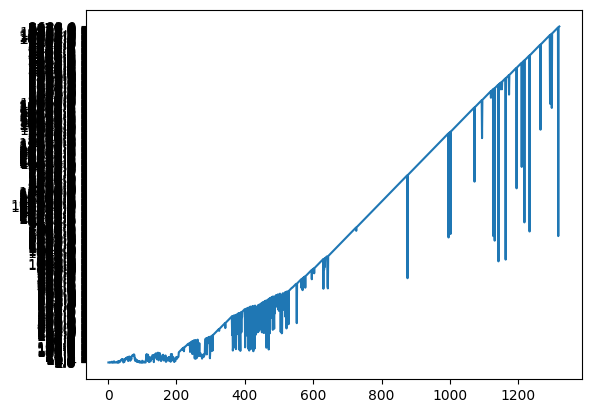

In [ ]:
plt.plot(korean.loc[:100,'_id'],korean.loc[:100,'Seoul'])

In [ ]:
import pandas as pd
import numpy as np
from prophet import Prophet
import matplotlib.pyplot as plt

# Sample COVID-19 data for three cities without a date column
data = {
    'seoul': [5, 7, 12],
    'busan': [1, 3, 5],
    'jeju': [0, 1, 2]
}

# Create the DataFrame (this has no date, only indexed by integer)
covid_data = all

# Step 1: Set the index as a date range (assuming daily data starting from '2020-01-01')
start_date = '2020-01-01'
covid_data.index = pd.date_range(start=start_date, periods=len(covid_data), freq='D')
covid_data.index.name = 'date'

# Now the DataFrame has a date index:
print(covid_data)

# Step 2: Convert the DataFrame for Prophet (Prophet requires columns 'ds' for date and 'y' for target)
def prepare_prophet_data(df, city_name):
    df_city = df[[city_name]].reset_index()  # Reset index to move 'date' into a column
    df_city.columns = ['ds', 'y']  # Rename columns as required by Prophet
    return df_city

# Step 3: Train and forecast using Prophet for each city
def train_forecast_prophet(df, city_name, prediction_days=7):
    data = prepare_prophet_data(df, city_name)

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(data)

    # Create future dates for prediction
    future = model.make_future_dataframe(periods=prediction_days)
    forecast = model.predict(future)

    return forecast

# Step 4: Forecast for each city
city_forecasts = {}
for city in ['seoul', 'busan', 'jeju']:
    city_forecasts[city] = train_forecast_prophet(covid_data, city)

# Step 5: Plotting function for visualizing forecasts
def plot_forecast(forecasts, city_name):
    plt.figure(figsize=(10, 6))
    plt.plot(forecasts['ds'], forecasts['yhat'], label='Predicted Cases', color='blue')
    plt.fill_between(forecasts['ds'], forecasts['yhat_lower'], forecasts['yhat_upper'], color='lightblue', alpha=0.5, label='Confidence Interval')
    plt.axvline(pd.Timestamp.today(), color='red', linestyle='--', label='Today')
    plt.title(f'COVID-19 Forecast for {city_name}')
    plt.xlabel('Date')
    plt.ylabel('Number of Cases')
    plt.legend()
    plt.grid()
    plt.show()

# Step 6: Plot forecast for a specific city (e.g., 'Seoul')
plot_forecast(city_forecasts['seoul'], 'Seoul')

# Step 7: Extract relationships between cities based on forecasts
def extract_relationships(city_forecasts):
    city_relationships = []

    # Define a threshold for what constitutes a "surge"
    surge_threshold = 1.5  # Example threshold (1.5 times the average forecast)

    for city_A, forecast_A in city_forecasts.items():
        average_forecast_A = forecast_A['yhat'].mean()
        forecast_A['surge'] = forecast_A['yhat'] > surge_threshold * average_forecast_A  # Identify surges

        for city_B, forecast_B in city_forecasts.items():
            if city_A != city_B:
                average_forecast_B = forecast_B['yhat'].mean()
                probability_of_boom = (forecast_B['surge'].rolling(window=7).sum() > 0).mean()  # Calculate probability of surge in B based on A's surge
                city_relationships.append({
                    "city_A": city_A,
                    "city_B": city_B,
                    "probability_of_boom": probability_of_boom
                })

    return sorted(city_relationships, key=lambda x: x['probability_of_boom'], reverse=True)

# Step 8: Extract and display relationships
city_relationships = extract_relationships(city_forecasts)
top_relationships = city_relationships[:10]

def display_top_relationships(top_relationships):
    for rel in top_relationships:
        print(f"{rel['city_A']} patient boom, then {rel['city_B']} is likely to boom with probability {rel['probability_of_boom']:.2f}")

# Step 9: Display top 10 relationships
display_top_relationships(top_relationships)


            กระบี่  กรุงเทพมหานคร  กาญจนบุรี  กาฬสินธุ์  กำแพงเพชร  ขอนแก่น  \
date                                                                          
2020-01-01     0.0            2.0        0.0        0.0        0.0      0.0   
2020-01-02     0.0            2.0        0.0        0.0        0.0      0.0   
2020-01-03     0.0            9.0        0.0        0.0        0.0      0.0   
2020-01-04     0.0            6.0        0.0        0.0        0.0      0.0   
2020-01-05     0.0            0.0        0.0        0.0        0.0      0.0   
...            ...            ...        ...        ...        ...      ...   
2020-05-30    67.0          854.0       12.0       15.0        2.0    145.0   
2020-05-31    28.0          806.0        9.0       27.0        9.0     90.0   
2020-06-01    25.0         1000.0        7.0       22.0        2.0     62.0   
2020-06-02     8.0          714.0       18.0       19.0       26.0     75.0   
2020-06-03     8.0          432.0        4.0       2

KeyError: "None of [Index(['seoul'], dtype='object')] are in the [columns]"